<h1 align="center">Tweets Classification</h1>
<div align="center">
  <strong>Data Mining Project</strong>
</div>
<div align="center" >
  __Sahar letaief 3DNI1__
</div>

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import csv
%matplotlib inline

## <font color='red'>Cleaning tweets</font>

In [324]:
tweet = pd.read_csv('tweets_virtual.csv')
print('Dataset size:',tweet.shape)

Dataset size: (14894, 2)


In [325]:
tweet.head()

,Date,Tweet
0,2020-12-15 17:32:53,b'Virtual reality is effective training for lu...
1,2020-12-15 17:32:40,b'PRIME STUDIOS helps brands connect emotional...
2,2020-12-15 17:32:10,b'We use a remote crawler camera to discover w...
3,2020-12-15 17:31:19,"b""Imagine @AmongUsGame in virtual reality that..."
4,2020-12-15 17:30:52,b'@BioshockLGP @412ging Brain dance. Virtual r...


In [268]:
!pip install tweet-preprocessor

In [326]:
import pandas as pd
tweet_df = pd.DataFrame(tweet[['Date', 'Tweet']])

In [327]:
import preprocessor as p
#Dropping duplicates and NaN 
tweet_df = tweet_df.dropna()
tweet_df = tweet_df.drop_duplicates()
tweet_df.head()

,Date,Tweet
0,2020-12-15 17:32:53,b'Virtual reality is effective training for lu...
1,2020-12-15 17:32:40,b'PRIME STUDIOS helps brands connect emotional...
2,2020-12-15 17:32:10,b'We use a remote crawler camera to discover w...
3,2020-12-15 17:31:19,"b""Imagine @AmongUsGame in virtual reality that..."
4,2020-12-15 17:30:52,b'@BioshockLGP @412ging Brain dance. Virtual r...


In [328]:
#remove th first character
tweet_df['Tweet'] = tweet_df['Tweet'].str[2:]

In [329]:
tweet_df.head()

,Date,Tweet
0,2020-12-15 17:32:53,Virtual reality is effective training for luci...
1,2020-12-15 17:32:40,PRIME STUDIOS helps brands connect emotionally...
2,2020-12-15 17:32:10,We use a remote crawler camera to discover wha...
3,2020-12-15 17:31:19,Imagine @AmongUsGame in virtual reality that w...
4,2020-12-15 17:30:52,@BioshockLGP @412ging Brain dance. Virtual rea...


In [330]:
tweet_df.shape

(3587, 2)

In [331]:
#clean Tweets to normal text
def preprocess_tweet(row):
    text = row['Tweet']
    text = p.clean(text)
    return text
tweet_df['Tweet'] = tweet_df.apply(preprocess_tweet, axis=1)

In [332]:
tweet_df.head(-1)

,Date,Tweet
0,2020-12-15 17:32:53,Virtual reality is effective training for luci...
1,2020-12-15 17:32:40,PRIME STUDIOS helps brands connect emotionally...
2,2020-12-15 17:32:10,We use a remote crawler camera to discover wha...
3,2020-12-15 17:31:19,Imagine in virtual reality that would be amazi...
4,2020-12-15 17:30:52,Brain dance. Virtual reality simulator'
...,...,...
11371,2020-12-15 19:32:04,"New blog post: ""When will virtual reality take..."
11372,2020-12-15 19:31:10,Future of virtual reality gaming '
11373,2020-12-15 19:24:04,As the unemployment rate gradually returns to ...
11374,2020-12-15 19:21:46,"Augmented Reality, Virtual Reality &amp; Fashi..."


In [228]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.Collecting gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108253 sha256=3f132107a7388e107886eda8c42af661075b05e3523321c222156ab43ef7b076
  Stored in directory: c:\users\sahar\appdata\local\pip\cache\wheels\8c\f9\f4\4ddd9ddee3488f48be20e9bf3108961f03ae23da29b7ed26d1
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [333]:
#stop word removal
from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['Tweet']
    text = remove_stopwords(text)
    return text
tweet_df['Tweet'] = tweet_df.apply(stopword_removal, axis=1)
tweet_df.head(-1)

,Date,Tweet
0,2020-12-15 17:32:53,Virtual reality effective training lucid dream...
1,2020-12-15 17:32:40,PRIME STUDIOS helps brands connect emotionally...
2,2020-12-15 17:32:10,We use remote crawler camera discover what\xe2...
3,2020-12-15 17:31:19,"Imagine virtual reality amazing,feeling like r..."
4,2020-12-15 17:30:52,Brain dance. Virtual reality simulator'
...,...,...
11371,2020-12-15 19:32:04,"New blog post: ""When virtual reality off? The ..."
11372,2020-12-15 19:31:10,Future virtual reality gaming '
11373,2020-12-15 19:24:04,"As unemployment rate gradually returns normal,..."
11374,2020-12-15 19:21:46,"Augmented Reality, Virtual Reality &amp; Fashi..."


In [334]:
import re
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|([0-9]+)|#","",elem))  
    return df
tweet_df = clean_text(tweet_df,'Tweet')
tweet_df.head()

,Date,Tweet
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...
4,2020-12-15 17:30:52,brain dance virtual reality simulator


In [335]:
#Create a new csv file with the cleande tweets
clean_tweets= tweet_df.to_csv('clean_VR_tweets.csv')

In [336]:
clean_tweets = pd.read_csv('clean_VR_tweets.csv')

In [337]:
clean_tweets_df = pd.DataFrame(clean_tweets[['Date', 'Tweet']])
clean_tweets_df.shape

(3587, 2)

In [338]:
clean_tweets_df= clean_tweets_df.drop_duplicates('Tweet')
clean_tweets_df.shape

(3132, 2)

## <font color='red'>NLP: Natural LanguageProcessing</font> 

In [25]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [339]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

clean_tweets_df['Text'] = clean_tweets_df['Tweet'].apply(lambda x: tokenization(x.lower()))
tokens =clean_tweets_df['Text']
clean_tweets_df.head(-1)


,Date,Tweet,Text
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...,"[virtual, reality, effective, training, lucid,..."
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...,"[prime, studios, helps, brands, connect, emoti..."
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...,"[we, use, remote, crawler, camera, discover, w..."
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...,"[imagine, virtual, reality, amazingfeeling, li..."
4,2020-12-15 17:30:52,brain dance virtual reality simulator,"[brain, dance, virtual, reality, simulator]"
...,...,...,...
3581,2020-12-15 19:32:04,new blog post when virtual reality off the betn,"[new, blog, post, when, virtual, reality, off,..."
3582,2020-12-15 19:31:10,future virtual reality gaming,"[future, virtual, reality, gaming, ]"
3583,2020-12-15 19:24:04,as unemployment rate gradually returns normal ...,"[as, unemployment, rate, gradually, returns, n..."
3584,2020-12-15 19:21:46,augmented reality virtual reality amp fashion ...,"[augmented, reality, virtual, reality, amp, fa..."


In [340]:
#Remove stopwords :Identified few more words to be removed along with English stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
clean_tweets_df['Text'] = clean_tweets_df['Text'].apply(lambda x: remove_stopwords(x))
clean_tweets_df.head(-1)

,Date,Tweet,Text
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...,"[virtual, reality, effective, training, lucid,..."
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...,"[prime, studios, helps, brands, connect, emoti..."
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...,"[use, remote, crawler, camera, discover, whatx..."
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...,"[imagine, virtual, reality, amazingfeeling, li..."
4,2020-12-15 17:30:52,brain dance virtual reality simulator,"[brain, dance, virtual, reality, simulator]"
...,...,...,...
3581,2020-12-15 19:32:04,new blog post when virtual reality off the betn,"[new, blog, post, virtual, reality, betn]"
3582,2020-12-15 19:31:10,future virtual reality gaming,"[future, virtual, reality, gaming, ]"
3583,2020-12-15 19:24:04,as unemployment rate gradually returns normal ...,"[unemployment, rate, gradually, returns, norma..."
3584,2020-12-15 19:21:46,augmented reality virtual reality amp fashion ...,"[augmented, reality, virtual, reality, amp, fa..."


In [341]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

clean_tweets_df['Text']= clean_tweets_df['Text'].apply(lambda x: stemming(x))
clean_tweets_df.head(-1)

,Date,Tweet,Text
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...,"[virtual, realiti, effect, train, lucid, dream..."
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...,"[prime, studio, help, brand, connect, emot, au..."
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...,"[use, remot, crawler, camera, discov, whatxexx..."
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...,"[imagin, virtual, realiti, amazingfeel, like, ..."
4,2020-12-15 17:30:52,brain dance virtual reality simulator,"[brain, danc, virtual, realiti, simul]"
...,...,...,...
3581,2020-12-15 19:32:04,new blog post when virtual reality off the betn,"[new, blog, post, virtual, realiti, betn]"
3582,2020-12-15 19:31:10,future virtual reality gaming,"[futur, virtual, realiti, game, ]"
3583,2020-12-15 19:24:04,as unemployment rate gradually returns normal ...,"[unemploy, rate, gradual, return, normal, virt..."
3584,2020-12-15 19:21:46,augmented reality virtual reality amp fashion ...,"[augment, realiti, virtual, realiti, amp, fash..."


In [342]:
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

clean_tweets_df['Text'] = clean_tweets_df['Text'].apply(lambda x: lemmatizer(x))
clean_tweets_df.head(-1) 

,Date,Tweet,Text
0,2020-12-15 17:32:53,virtual reality effective training lucid dream...,"[virtual, realiti, effect, train, lucid, dream..."
1,2020-12-15 17:32:40,prime studios helps brands connect emotionally...,"[prime, studio, help, brand, connect, emot, au..."
2,2020-12-15 17:32:10,we use remote crawler camera discover whatxexx...,"[use, remot, crawler, camera, discov, whatxexx..."
3,2020-12-15 17:31:19,imagine virtual reality amazingfeeling like ru...,"[imagin, virtual, realiti, amazingfeel, like, ..."
4,2020-12-15 17:30:52,brain dance virtual reality simulator,"[brain, danc, virtual, realiti, simul]"
...,...,...,...
3581,2020-12-15 19:32:04,new blog post when virtual reality off the betn,"[new, blog, post, virtual, realiti, betn]"
3582,2020-12-15 19:31:10,future virtual reality gaming,"[futur, virtual, realiti, game, ]"
3583,2020-12-15 19:24:04,as unemployment rate gradually returns normal ...,"[unemploy, rate, gradual, return, normal, virt..."
3584,2020-12-15 19:21:46,augmented reality virtual reality amp fashion ...,"[augment, realiti, virtual, realiti, amp, fash..."


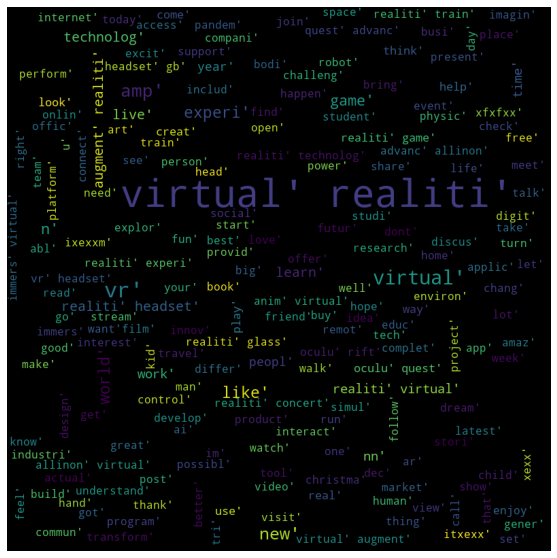

In [344]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 
for val in clean_tweets_df.Text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

## <font color='red'> Clustering </font>

In [362]:
from sklearn.feature_extraction.text import CountVectorizer
countVector = countVectorizer.fit_transform(clean_tweets_df['Text'])
print('{} tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

3132 tweets has 8431 words


Fit 3 clusters
Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters
Fit 21 clusters
Fit 23 clusters
Fit 25 clusters
Fit 27 clusters
Fit 29 clusters


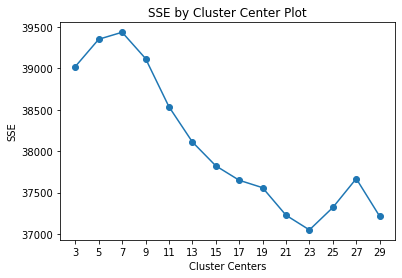

In [365]:
from sklearn.cluster import KMeans
#Finding Optimal Clusters
def find_optimal_clusters(data, max_k):
    iters = range(3, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(countVector, 30)

In [385]:
#k=23
clean_tweets_df['clusters'] = KMeans(n_clusters=23, init='k-means++', max_iter=100, n_init=1).fit_predict(countVector)
clusters= KMeans(n_clusters=23, init='k-means++', max_iter=100, n_init=1).fit_predict(countVector) #added to visualize the hole numpy
print(clean_tweets_df['clusters'])

0        9
1        1
2       11
3       11
4       11
        ..
3582     4
3583     9
3584    22
3585    11
3586    11
Name: clusters, Length: 3132, dtype: int32


In [386]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(clusters)

[ 3  3  3  6  3  8  3  8  2  3  3  3 17  3  3  3  2  2 11  3 11  3  8  3
  6  8  3  8  3  3  3  2  3  2  3  3  3  3  8  6 11  3  8  3  8  6  3  3
  3 17  8  3  8  3  3  3  3  3  6  8  3  3  3  3  6  3  8  3  8  3  3  3
  3  3  3 17  3  3  2  3  3  3  8  3  9  3  3  8  3 11  3  8  3  3  8  8
  3  3  8  2  3  3  3  3  3  2  3  3  8  3  2  3  3  3  3  3  3  3 11  3
  3  3  3  8  3  3  3  3  3  3  3  3  8  8  3  8  8 11  8  3  3  3  8  6
  3  8  3  8  3  3  2  3  2 11  3  3 11  3  3  3  3 17  3  8  8  8  3  3
  3  5  8  3  8  8  3  3 11  3  3  8  8  3  6  3  3  8 14  8  3  3  3  3
 11  8 17  8  3 11  3  3  2 17  3  3  3  3 11  3  8  3  8  8  3  3  3 11
  3  3  2  3  3  3  3  3  3  8  3  3  3  3  3 12  6  8  3 11  3  3  8  3
  3  3  8  8 13  8  3  2  3  3  2  2  8  3  8  3  3  3  3  3  3  3  8  8
  8  3  8  3  3  8  3  8  3  3  3  8  3  3  3  8  3  3  3  3  3  3  3  3
  8  3  3  3  3  3  6  3  3  3 11 17  3  6  3  2  8  3  3  8  3  3  3  8
  8  2  3  8  6  3  2  3  3 11  8  8  3  3  3  3  8

3132


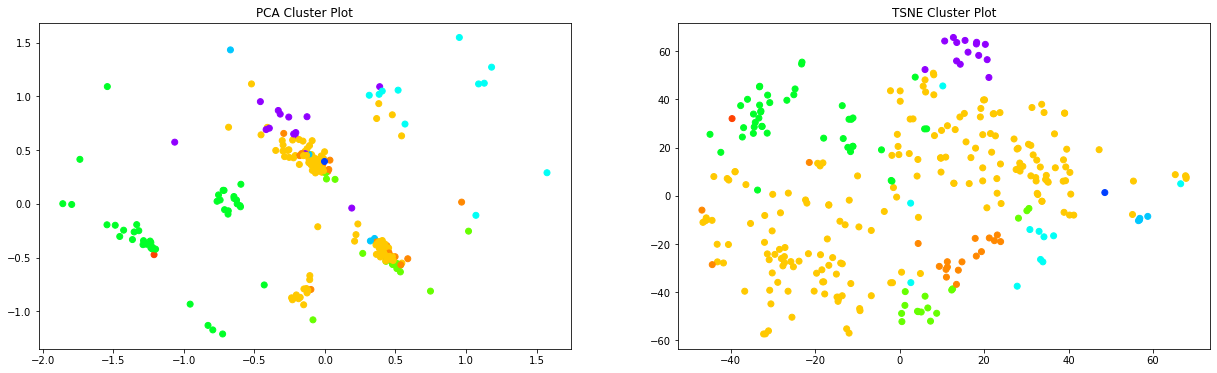

In [387]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.cm as cm
#Plotting Clusters
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(21, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(countVector, clusters)
print(len(clusters))

In [384]:
def get_top_keywords(data, clusters):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    df.head()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(clean_tweets_df[clean_tweets_df['clusters']==i]['Text'])
            
get_top_keywords(countVector, clusters)


Cluster 0
229    [know, im, kind, disappoint, come, augment, re...
Name: Text, dtype: object

Cluster 1
378     [dont, miss, check, virtual, realiti, art, old...
682     [monument, news, deserv, attent, like, attent,...
2122    [start, soon, vr, burn, xfxfxxa, vr, art, live...
2131    [invis, ufo, art, virtual, realiti, art, like,...
2318    [featur, art, day, madam, anni, virtual, reali...
2462    [hey, pink, thing, open, saturday, basement, g...
2484    [congrat, monument, piec, art, nn, legend, vir...
2715    [want, buy, land, govern, away, build, big, as...
Name: Text, dtype: object

Cluster 2
9       [read, fourth, transform, rapid, migrat, virtu...
18      [team, virtual, realiti, clip, virtual, realit...
20      [drink, virtual, realiti, decemb, pm, londonnn...
40      [interplay, learn, featur, emerg, startup, vir...
74      [realiti, virtual, temporarili, new, inperson,...
                              ...                        
3548    [s, runway, film, explor, intim, condu